# Projeto 1: Classificação Binária Breast Cancer

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np 
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import torch.nn as nn

np.random.seed(42)
torch.manual_seed(42)

In [2]:
torch.__version__

'2.6.0+cpu'

## Etapa 2: Base de Dados

In [3]:
previsores = pd.read_csv('./Bases/Bases/entradas_breast.csv')
classe = pd.read_csv('./Bases/Bases/saidas_breast.csv')

In [4]:
previsores.shape

(569, 30)

In [5]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [6]:
np.unique(classe)

array([0, 1], dtype=int64)

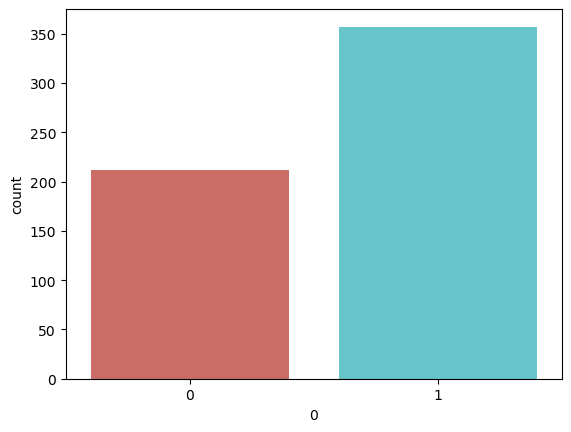

In [7]:
sns.countplot(x='0', data=classe, palette='hls', hue='0', legend=False);

In [8]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.25, random_state=42)

In [9]:
previsores_treinamento.shape, previsores_teste.shape, classe_treinamento.shape, classe_teste.shape 

((426, 30), (143, 30), (426, 1), (143, 1))

## Etapa 3: Transformação dos dados para tensores

In [10]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype=torch.float)

In [11]:
type(previsores_treinamento), type(classe_treinamento)

(torch.Tensor, torch.Tensor)

In [12]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [13]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [14]:
classificador = nn.Sequential(
    nn.Linear(30, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [15]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [16]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [17]:
def train(model, train_loader, epochs=100):
    for epoch in range(epochs):
        running_loss = 0.0
        for data in train_loader:
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs} loss: {running_loss/len(train_loader)}')

In [18]:
train(classificador, train_loader, epochs=100)

Epoch 1/100 loss: 10.768446304077326
Epoch 2/100 loss: 2.7603256135832432
Epoch 3/100 loss: 1.4159593069276144
Epoch 4/100 loss: 0.7044955443504245
Epoch 5/100 loss: 0.6835518099887427
Epoch 6/100 loss: 0.383892047630493
Epoch 7/100 loss: 0.6037732985650384
Epoch 8/100 loss: 0.2824384972106579
Epoch 9/100 loss: 0.2595168122545231
Epoch 10/100 loss: 0.2475065805537756
Epoch 11/100 loss: 0.310854519609102
Epoch 12/100 loss: 0.2356721483127669
Epoch 13/100 loss: 0.25209619858583737
Epoch 14/100 loss: 0.23270163944987363
Epoch 15/100 loss: 0.23848347108118062
Epoch 16/100 loss: 0.2063277908275987
Epoch 17/100 loss: 0.2438664756888567
Epoch 18/100 loss: 0.28400414688296094
Epoch 19/100 loss: 0.2219947864149892
Epoch 20/100 loss: 0.22884747333997904
Epoch 21/100 loss: 0.1983977863781674
Epoch 22/100 loss: 0.2613160200850215
Epoch 23/100 loss: 0.27163379145569577
Epoch 24/100 loss: 0.22425989174219066
Epoch 25/100 loss: 0.26578477820987967
Epoch 26/100 loss: 0.2259029916942466
Epoch 27/100 lo

## Etapa 6: Visualização dos pesos

In [19]:
params = list(classificador.parameters())

In [20]:
params

[Parameter containing:
 tensor([[-6.7047e-02,  1.2647e-01, -2.6380e-01,  8.0228e-02, -2.1039e-02,
           7.3646e-02, -3.8681e-02,  6.4473e-03,  4.6321e-02, -5.0237e-04,
           1.5157e-01,  3.8141e-02,  9.7813e-02,  9.5623e-02,  8.0932e-03,
          -1.7582e-01,  1.4276e-01, -1.4056e-01,  6.8775e-02,  2.6168e-01,
          -3.2357e-01,  4.1729e-02, -2.4658e-01,  6.9130e-02, -2.9534e-01,
          -1.2235e-01, -2.5239e-01, -1.6792e-01, -1.5795e-01,  5.0240e-02],
         [ 1.1477e-01, -1.5002e-01, -3.9405e-02,  6.5307e-05,  9.1533e-02,
           7.2518e-02,  8.4781e-02,  1.1925e-01, -2.8373e-02, -6.8659e-02,
           9.2077e-02, -2.1360e-02,  6.9109e-02,  1.2491e-01,  2.4290e-02,
          -2.1839e-01,  1.1823e-01, -1.9843e-01,  1.1583e-01,  1.8124e-01,
          -3.7764e-01,  2.6968e-02, -2.6733e-01,  1.6276e-01,  4.6862e-02,
           7.9380e-02,  2.8672e-02,  4.0244e-02,  1.2518e-01,  1.0407e-01],
         [ 4.3195e-02, -2.5811e-01,  1.4246e-01, -7.2937e-02, -1.6527e-01,


In [21]:
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

## Etapa 7: Avaliação do modelo

In [22]:
# colocando em modo de avaliação
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [23]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [24]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [25]:
type(previsores_teste)

torch.Tensor

In [26]:
previsoes = classificador(previsores_teste)
previsoes = np.array(previsoes > 0.5)
accuracy = accuracy_score(classe_teste, previsoes)
print(f"Acurácia obtida no conjunto de treinamento: {accuracy*100:.2f}%")

Acurácia obtida no conjunto de treinamento: 88.81%


In [27]:
matriz = confusion_matrix(classe_teste, previsoes)

In [28]:
matriz

array([[49,  5],
       [11, 78]], dtype=int64)

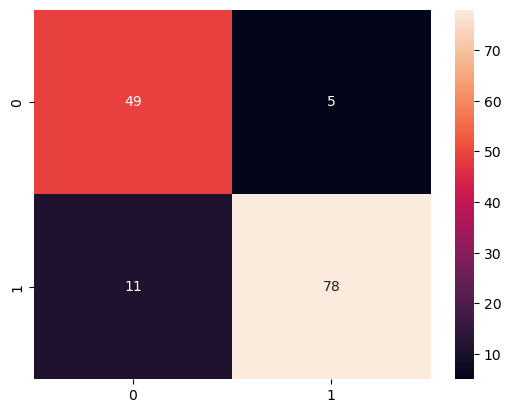

In [29]:
sns.heatmap(matriz, annot=True);

# Projeto 2: Classificação binária Brest Cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [30]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

torch.manual_seed(42)
np.random.seed(42)

torch.__version__

'2.6.0+cpu'

## Etapa 2: Base de dados

In [31]:
previsores = pd.read_csv('./Bases/Bases/entradas_breast.csv')
classe = pd.read_csv('./Bases/Bases/saidas_breast.csv')

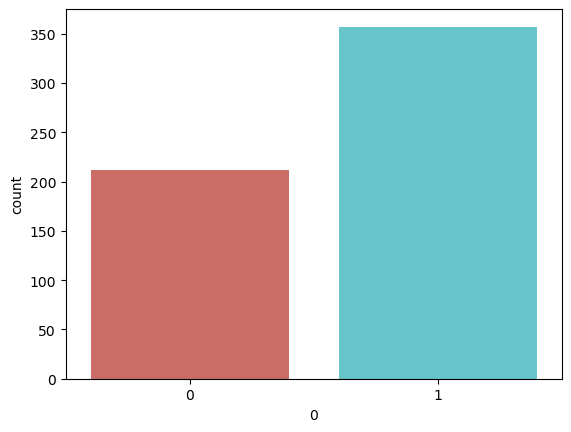

In [32]:
sns.countplot(x='0', data=classe, palette='hls', hue='0', legend=False);

In [33]:
previsores = np.array(previsores, dtype=np.float32)
classe = np.array(classe, dtype=np.float32).squeeze(1)
classe.shape


(569,)

## Etapa 3: Classe para estrutura da rede neural

In [34]:
class classificador_torch(nn.Module): # necessario herdar nn.Module para que haja integração com o skorch
    def __init__(self):
        super().__init__() # herdando da classe nn.Module

        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()

        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()

        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X): # interessante pois posso determinar meu próprio forward
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

## Etapa 4: Skorch

In [35]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                   criterion=nn.BCELoss, 
                                                   optimizer=torch.optim.Adam, 
                                                   optimizer__weight_decay=0.0001,
                                                   lr=0.001, 
                                                   max_epochs=100, 
                                                   batch_size=10, 
                                                   train_split=False, # iremos configurar manualmente a validação cruzada
                                                   )

## Etapa 5: Validação cruzada

In [36]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv=3, scoring='accuracy') # nao necessario converter previsores e classe para tensor

  epoch    train_loss     dur
-------  ------------  ------
      1       37.2032  0.1021
      2       37.2032  0.0663
      3       37.2032  0.0615
      4       37.2032  0.0551
      5       37.2032  0.0501
      6       37.2032  0.0498
      7       37.2032  0.0336
      8       37.2032  0.0558
      9       37.2032  0.0443
     10       37.2032  0.0332
     11       37.2032  0.0457
     12       37.2032  0.0393
     13       37.2032  0.0296
     14       37.2032  0.0490
     15       37.2032  0.0334
     16       37.2032  0.0331
     17       37.2032  0.0479
     18       37.2032  0.0338
     19       37.2032  0.0337
     20       37.2032  0.0331
     21       37.2032  0.0419
     22       37.2032  0.0259
     23       37.2032  0.0487
     24       37.2032  0.0334
     25       37.2032  0.0335
     26       37.2032  0.0330
     27       37.2032  0.0460
     28       37.2032  0.0351
     29       37.2032  0.0338
     30       37.2032  0.0332
     31       37.2032  0.0372
     32   

In [37]:
resultados.shape

(3,)

In [38]:
media = resultados.mean()
media

0.6976329713171818

In [39]:
desvio = resultados.std()
desvio

0.08414475904617044

## Etapa 6: Dropout

In [40]:
class classificador_torch(nn.Module): # necessario herdar nn.Module para que haja integração com o skorch
    def __init__(self):
        super().__init__() # herdando da classe nn.Module

        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.uniform_(self.dense0.weight)
        self.activation0 = nn.ReLU()
        self.dropout0 = nn.Dropout(0.2)

        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.uniform_(self.dense1.weight)
        self.activation1 = nn.ReLU()
        self.droupout1 = nn.Dropout(0.2)

        self.dense2 = nn.Linear(16, 1)
        torch.nn.init.uniform_(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X): # interessante pois posso determinar meu próprio forward
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.droupout1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

In [41]:
classificador_sklearn_dropout = NeuralNetBinaryClassifier(module=classificador_torch,
                                                   criterion=nn.BCELoss, 
                                                   optimizer=torch.optim.Adam, 
                                                   optimizer__weight_decay=0.0001,
                                                   lr=0.001, 
                                                   max_epochs=100, 
                                                   batch_size=10, 
                                                   train_split=False, # iremos configurar manualmente a validação cruzada
                                                   )

In [42]:
resultados = cross_val_score(classificador_sklearn_dropout, previsores, classe, cv=10, scoring='accuracy') # nao necessario converter previsores e classe para tensor

  epoch    train_loss     dur
-------  ------------  ------
      1       37.1094  0.1488
      2       37.1094  0.0893
      3       37.1094  0.0807
      4       37.1094  0.0758
      5       37.1094  0.0725
      6       37.1094  0.0725
      7       37.1094  0.0951
      8       37.1094  0.1108
      9       37.1094  0.1685
     10       37.1094  0.1002
     11       37.1094  0.1131
     12       37.1094  0.0937
     13       37.1094  0.0902
     14       37.1094  0.0906
     15       37.1094  0.0757
     16       37.1094  0.0811
     17       37.1094  0.0835
     18       37.1094  0.0733
     19       37.1094  0.0725
     20       37.1094  0.0770
     21       37.1094  0.0755
     22       37.1094  0.0701
     23       37.1094  0.0726
     24       37.1094  0.0716
     25       37.1094  0.0703
     26       37.1094  0.0730
     27       11.7217  0.0632
     28        0.5957  0.0797
     29        0.5416  0.0709
     30        0.5397  0.0667
     31        0.5150  0.0530
     32   

In [43]:
resultados

array([0.84210526, 0.84210526, 0.87719298, 0.96491228, 0.87719298,
       0.92982456, 0.87719298, 0.89473684, 0.9122807 , 0.89285714])

In [44]:
media = resultados.mean()
media

0.8910401002506264

In [45]:
desvio = resultados.std()
desvio

0.035768601795661784

# Projeto 3: Classificação binária Brest Cancer com tuning de parâmetros

## Etapa 1: Importação das bibliotecas

In [46]:
import pandas as pd
import numpy as np
import torch.nn as nn
from skorch import NeuralNetBinaryClassifier
import torch
import torch.nn.functional as F
from sklearn.model_selection import GridSearchCV

torch.manual_seed(42)
np.random.seed(42)

torch.__version__

'2.6.0+cpu'

## Etapa 2: Base de dados

In [47]:
previores = pd.read_csv('./Bases/Bases/entradas_breast.csv')
classe = pd.read_csv('./Bases/Bases/saidas_breast.csv')

In [48]:
previsores = np.array(previsores, dtype=np.float32)
classe = np.array(classe, dtype=np.float32).squeeze(1)

In [49]:
previsores.shape

(569, 30)

In [50]:
classe.shape

(569,)

## Etapa 3: Classe para estrutura da rede neural

In [51]:
class classificador_torch(nn.Module): # necessario herdar nn.Module para que haja integração com o skorch
    def __init__(self, activation, neurons, initializer):
        super().__init__() # herdando da classe nn.Module

        self.dense0 = nn.Linear(30, neurons)
        initializer(self.dense0.weight)
        self.activation0 = activation
        self.dropout0 = nn.Dropout(0.2)

        self.dense1 = nn.Linear(neurons, neurons)
        initializer(self.dense1.weight)
        self.activation1 = activation
        self.droupout1 = nn.Dropout(0.2)

        self.dense2 = nn.Linear(neurons, 1)
        initializer(self.dense2.weight)
        self.output = nn.Sigmoid()
        
    def forward(self, X): # interessante pois posso determinar meu próprio forward
        X = self.dense0(X)
        X = self.activation0(X)
        X = self.dropout0(X)
        X = self.dense1(X)
        X = self.activation1(X)
        X = self.droupout1(X)
        X = self.dense2(X)
        X = self.output(X)
        return X

## Etapa 4: Skorch

In [52]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  lr = 0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  train_split=False)

## Etapa 5: Tuning dos parâmetros

In [53]:
params = {'batch_size': [30],
          'max_epochs': [100],
          'optimizer': [torch.optim.Adam],
          'criterion': [nn.BCELoss],
          'module__neurons': [16], # formato com 'module__' na frente pois são parâmetros do otimizador
          'module__activation': [F.relu, F.tanh],
          'module__initializer': [nn.init.uniform_, nn.init.normal_]
}

In [54]:
grid_search = GridSearchCV(classificador_sklearn, params, scoring='accuracy', cv=4)

In [55]:
grid_search.fit(previsores, classe)

  epoch    train_loss     dur
-------  ------------  ------
      1       37.3239  0.0568


      2       37.3239  0.0543
      3       37.3239  0.0450
      4       37.3239  0.0342
      5       37.3239  0.0375
      6       37.3239  0.0335
      7       37.3239  0.0308
      8       37.3239  0.0340
      9       37.3239  0.0271
     10       37.3239  0.0309
     11       37.3239  0.0268
     12       37.3239  0.0270
     13       37.3239  0.0169
     14       37.3239  0.0263
     15       37.3239  0.0242
     16       37.3239  0.0236
     17       37.3239  0.0295
     18       37.3239  0.0320
     19       37.3239  0.0473
     20       37.3239  0.0307
     21       37.3239  0.0247
     22       37.3239  0.0209
     23       37.3239  0.0177
     24       37.3239  0.0372
     25       37.3239  0.0235
     26       37.3239  0.0214
     27       37.3239  0.0164
     28       37.3239  0.0259
     29       37.3239  0.0242
     30       37.3239  0.0275
     31       37.3239  0.0281
     32       37.3239  0.0178
     33       37.3239  0.0366
     34       37.3239  0.0289
     35   

GridSearchCV(cv=4,
             estimator=NeuralNetBinaryClassifier(_params_to_validate={'optimizer__weight_decay'}, batch_size=128, callbacks=None, compile=False, dataset=<class 'skorch.dataset.Dataset'>, device='cpu', iterator_train=<class 'torch.utils.data.dataloader.DataLoader'>, iterator_valid=<class 'torch.utils.data.dataloader.DataLoader'>, lr=0.001, max_epochs=10, mo...
                         'criterion': [<class 'torch.nn.modules.loss.BCELoss'>],
                         'max_epochs': [100],
                         'module__activation': [<function relu at 0x0000018F1024A700>,
                                                <function tanh at 0x0000018F1024B100>],
                         'module__initializer': [<function uniform_ at 0x0000018F102C3560>,
                                                 <function normal_ at 0x0000018F102C3600>],
                         'module__neurons': [16],
                         'optimizer': [<class 'torch.optim.adam.Adam'>]},
             scoring='accuracy')

In [56]:
melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_

In [57]:
melhores_parametros, melhor_precisao

({'batch_size': 30,
  'criterion': torch.nn.modules.loss.BCELoss,
  'max_epochs': 100,
  'module__activation': <function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>,
  'module__initializer': <function torch.nn.init.uniform_(tensor: torch.Tensor, a: float = 0.0, b: float = 1.0, generator: Optional[torch._C.Generator] = None) -> torch.Tensor>,
  'module__neurons': 16,
  'optimizer': torch.optim.adam.Adam},
 0.7242194425293016)

# Projeto 4: Classificação binária Breast Cancer - classificar somente um registro e salvar o classificador

## Etapa 1: Importação das bibliotecas

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import torch
import torch.nn as nn

np.random.seed(42)
torch.manual_seed(42)

torch.__version__

'2.6.0+cpu'

## Etapa 2: Base de dados

In [59]:
previsores = pd.read_csv('./Bases/Bases/entradas_breast.csv')
classes = pd.read_csv('./Bases/Bases/saidas_breast.csv')

In [60]:
previsores = torch.tensor(np.array(previsores), dtype=torch.float)
classes = torch.tensor(np.array(classes), dtype=torch.float)

## Etapa 3: Transformação dos dados para tensores

In [61]:
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(previsores, classes), batch_size=10, shuffle=True)

## Etapa 4: Contrução do modelo

In [73]:
class classificador_torch(nn.Module):
    def __init__(self):
        super().__init__()

        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.normal_(self.dense0.weight, mean=0.0, std=0.05) # configuração de inicialização do keras

        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.normal_(self.dense1.weight, mean=0.0, std=0.05)
        self.activation1 = nn.ReLU()

        self.dense2 = nn.Linear(16, 1)
        self.activation2 = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Sigmoid()
    
    def forward(self, X):
        X = self.dense0(X)
        
        X = self.dense1(X)
        X = self.activation1(X)
    
        X = self.dense2(X)
        X = self.activation2(X)
        X = self.dropout(X)
        X = self.output(X)
        
        return X

In [74]:
classificador = classificador_torch()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [75]:
def train(model, train_loader, epochs=100):
    for epoch in range(epochs):
        running_loss = 0.0

        for data in train_loader:
            inputs, labels = data
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs} loss: {running_loss/len(train_loader)}')

In [76]:
train(classificador, train_loader, epochs=100)

Epoch 1/100 loss: 1.140583071269487
Epoch 2/100 loss: 0.5777509092238912
Epoch 3/100 loss: 0.5758622628554964
Epoch 4/100 loss: 0.5723089523482741
Epoch 5/100 loss: 0.5596633380965182
Epoch 6/100 loss: 0.5855091428547575
Epoch 7/100 loss: 0.5629152927482337
Epoch 8/100 loss: 0.5732014309941676
Epoch 9/100 loss: 0.5554155179283076
Epoch 10/100 loss: 0.5554048549710658
Epoch 11/100 loss: 0.5558865248111257
Epoch 12/100 loss: 0.5583988386288024
Epoch 13/100 loss: 0.5564874081235183
Epoch 14/100 loss: 0.5494867824671561
Epoch 15/100 loss: 0.5334616235473699
Epoch 16/100 loss: 0.5455839926736397
Epoch 17/100 loss: 0.543208205386212
Epoch 18/100 loss: 0.5328075138100407
Epoch 19/100 loss: 0.5414915916166807
Epoch 20/100 loss: 0.543293564466008
Epoch 21/100 loss: 0.5233326891535207
Epoch 22/100 loss: 0.5144120041738477
Epoch 23/100 loss: 0.5180973138725549
Epoch 24/100 loss: 0.5149904615000674
Epoch 25/100 loss: 0.5424551111564302
Epoch 26/100 loss: 0.5295284986495972
Epoch 27/100 loss: 0.520

## Etapa 6: Classificar somente um registro

In [77]:
novo = torch.tensor([15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178, 
                     0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015, 
                     0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185, 0.84, 158, 0.363], dtype=torch.float)

In [78]:
classificador.eval()
previsao = classificador(novo)
previsao = previsao.detach()
previsao = previsao.numpy()
previsao = previsao > 0.5
previsao

array([ True])

## Etapa 7: Salvar o classificador

In [79]:
classificador.state_dict()

OrderedDict([('dense0.weight',
              tensor([[-2.9874e-01, -2.4318e-02, -2.8736e-01, -6.0441e-02,  9.2354e-02,
                        1.2011e-01,  1.1482e-01, -2.1392e-01, -1.8156e-01, -6.7864e-02,
                       -8.2370e-02, -5.9511e-02,  4.1297e-02,  1.0247e-01, -2.9426e-03,
                       -8.9640e-02, -1.2226e-01, -1.1409e-01, -4.9019e-02,  1.6793e-01,
                       -4.3635e-02,  4.4012e-02, -9.6899e-02,  6.4170e-02,  9.2050e-02,
                       -1.0689e-01,  1.0891e-01, -8.0071e-03, -5.0805e-03,  1.2771e-01],
                      [ 3.0755e-02, -3.1563e-02,  1.0958e-01,  2.5881e-02,  1.1664e-02,
                        2.1585e-02, -1.1671e-01,  1.7554e-01,  3.4069e-01,  1.8274e-01,
                        1.0541e-02,  5.2146e-02, -8.5857e-02,  1.2377e-02,  6.8551e-03,
                       -6.6760e-03,  9.6605e-02, -3.8297e-02,  5.5081e-02, -9.7353e-02,
                        1.9366e-02, -1.7553e-01, -3.7163e-02, -4.2237e-02, -2.3373e-01,


In [80]:
torch.save(classificador.state_dict(), './models/classificador_binario.pth')

# Projeto 5: Classificação binária Brest Cancer - carregar o classificador

## Etapa 1: Importação das bibliotecas

In [81]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

torch.manual_seed(42)
np.random.seed(42)

## Etapa 2: Carregamento do classificador

PyTorch ainda não tinha estrutura para fazer CV e também salvar a estrutura da rede neural

In [89]:
class classificador_torch(nn.Module):
    def __init__(self):
        super().__init__()

        self.dense0 = nn.Linear(30, 16)
        torch.nn.init.normal_(self.dense0.weight, mean=0.0, std=0.05) # configuração de inicialização do keras

        self.dense1 = nn.Linear(16, 16)
        torch.nn.init.normal_(self.dense1.weight, mean=0.0, std=0.05)
        self.activation1 = nn.ReLU()

        self.dense2 = nn.Linear(16, 1)
        self.activation2 = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Sigmoid()
    
    def forward(self, X):
        X = self.dense0(X)
        
        X = self.dense1(X)
        X = self.activation1(X)
    
        X = self.dense2(X)
        X = self.activation2(X)
        X = self.dropout(X)
        X = self.output(X)
        
        return X

In [91]:
classificador = classificador_torch()
state_dict = torch.load('./models/classificador_binario.pth')
state_dict

OrderedDict([('dense0.weight',
              tensor([[-2.9874e-01, -2.4318e-02, -2.8736e-01, -6.0441e-02,  9.2354e-02,
                        1.2011e-01,  1.1482e-01, -2.1392e-01, -1.8156e-01, -6.7864e-02,
                       -8.2370e-02, -5.9511e-02,  4.1297e-02,  1.0247e-01, -2.9426e-03,
                       -8.9640e-02, -1.2226e-01, -1.1409e-01, -4.9019e-02,  1.6793e-01,
                       -4.3635e-02,  4.4012e-02, -9.6899e-02,  6.4170e-02,  9.2050e-02,
                       -1.0689e-01,  1.0891e-01, -8.0071e-03, -5.0805e-03,  1.2771e-01],
                      [ 3.0755e-02, -3.1563e-02,  1.0958e-01,  2.5881e-02,  1.1664e-02,
                        2.1585e-02, -1.1671e-01,  1.7554e-01,  3.4069e-01,  1.8274e-01,
                        1.0541e-02,  5.2146e-02, -8.5857e-02,  1.2377e-02,  6.8551e-03,
                       -6.6760e-03,  9.6605e-02, -3.8297e-02,  5.5081e-02, -9.7353e-02,
                        1.9366e-02, -1.7553e-01, -3.7163e-02, -4.2237e-02, -2.3373e-01,


In [92]:
classificador.load_state_dict(state_dict)

<All keys matched successfully>

## Etapa 3: Previsões

In [87]:
novo = torch.tensor([15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178, 
                     0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015, 
                     0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185, 0.84, 158, 0.363], dtype=torch.float)

In [93]:
classificador.eval()
previsao = classificador(novo)
previsao = (previsao.detach().numpy() > 0.5)
previsao

array([ True])

In [94]:
previsores = pd.read_csv('./Bases/Bases/entradas_breast.csv')
classes = pd.read_csv('./Bases/Bases/saidas_breast.csv')

previsores = torch.tensor(np.array(previsores), dtype=torch.float)
classes = torch.tensor(np.array(classes), dtype=torch.float)

previsores = classificador(previsores).detach()
previsores

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.7912],
        [0.9314],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.9644],
        [0.8664],
        [1.0000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.7069],
        [0.9999],
        [0.5000],
        [0.5000],
        [0.5038],
        [0.9743],
        [0.5000],
        [0.5000],
        [0.6635],
        [0.5000],
        [1.0000],
        [0.5271],
        [0.9645],
        [0.9711],
        [0.9422],
        [0.9589],
        [0.9548],
        [0.5000],
        [0.5000],
        [0

In [95]:
F.binary_cross_entropy(previsores, classes)

tensor(0.3525)

In [96]:
accuracy = accuracy_score(classes, previsores.numpy() > 0.5)
accuracy

0.9226713532513181